In [1]:
import random
from tqdm import tqdm
import networkx as nx
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


path = 'df1.csv'

df = pd.read_csv(path, index_col=0)
df

,From,To,Connection
0,0,79,0
1,0,500,0
2,0,749,0
3,0,1043,0
4,0,1222,0
...,...,...,...
703112,721,9311,1
703113,7874,6689,1
703114,7874,8734,1
703115,2020,2871,1


In [80]:
df_2 = df.copy()
df_2.sort_values(['From', 'To'], inplace=True)
df_2 = df_2[df_2['From'] != df_2['To']]
df_2

,From,To,Connection
0,0,79,0
1,0,500,0
2,0,749,0
699735,0,760,1
3,0,1043,0
...,...,...,...
660591,9876,8233,0
660592,9876,8289,0
660593,9876,9135,0
660594,9876,9302,0


In [81]:
df_2['Edges'] = list(zip(df_2.From, df_2.To))
 
#dropping the Node 1 and Node 2 columns and setting the Edges column as index
df_2.drop(columns=df_2.columns[:2], inplace=True)
df_2 = df_2.set_index('Edges')
df_2

,Connection
Edges,
"(0, 79)",0
"(0, 500)",0
"(0, 749)",0
"(0, 760)",1
"(0, 1043)",0
...,...
"(9876, 8233)",0
"(9876, 8289)",0
"(9876, 9135)",0


In [82]:
path = '/home/shady/Projects/GML/Project_3/Graph Processor/CA-HepTh(corrected_index).csv'

df = pd.read_csv(path)
df

,From,To
0,3521,3524
1,3521,5739
2,3521,8396
3,3524,522
4,3524,549
...,...,...
51966,8919,9199
51967,2020,2871
51968,2020,5504
51969,2871,2020


In [83]:
G = nx.from_pandas_edgelist(df,'From','To')
print(G)

Graph with 9877 nodes and 25998 edges


In [84]:
df_2['Common_Neigh'] = [len(list(nx.common_neighbors(G, e[0],e[1]))) for e in df_2.index]
df_2

,Connection,Common_Neigh
Edges,,
"(0, 79)",0,0
"(0, 500)",0,0
"(0, 749)",0,0
"(0, 760)",1,2
"(0, 1043)",0,0
...,...,...
"(9876, 8233)",0,0
"(9876, 8289)",0,0
"(9876, 9135)",0,0


In [85]:
#creating a new temporary dataframe for storing the similarity measure values
df_3 = pd.DataFrame()
 
#finding jaccard coefficients
jaccard = list(nx.jaccard_coefficient(G, list(df_2.index)))
 
#storing the values in the new dataframe and setting the index as edges
df_3['Jaccard_Coef'] = [i[2] for i in jaccard]
df_3['Edges'] = [(i[0],i[1]) for i in jaccard]
df_3.set_index('Edges', inplace=True)
 
#merging the new dataframe with our previous 'df2' dataframe
df_2 = df_2.join(df_3, how='inner')

df_2

,Connection,Common_Neigh,Jaccard_Coef
Edges,,,
"(0, 79)",0,0,0.000000
"(0, 500)",0,0,0.000000
"(0, 749)",0,0,0.000000
"(0, 760)",1,2,0.333333
"(0, 1043)",0,0,0.000000
...,...,...,...
"(9876, 8233)",0,0,0.000000
"(9876, 8289)",0,0,0.000000
"(9876, 9135)",0,0,0.000000


In [86]:
df_3 = pd.DataFrame()
 
#finding resource allocation index
resource_alloc = list(nx.resource_allocation_index(G, list(df_2.index)))
 
#storing the values in a new dataframe and setting the index as edges
df_3['Resource_Alloc'] = [i[2] for i in resource_alloc]
df_3['index'] = [(i[0],i[1]) for i in resource_alloc]
df_3.set_index('index', inplace=True)
 
#merging the new dataframe with our previous 'df2' dataframe
df_2 = df_2.join(df_3, how='inner')

df_2

,Connection,Common_Neigh,Jaccard_Coef,Resource_Alloc
Edges,,,,
"(0, 79)",0,0,0.000000,0.000000
"(0, 500)",0,0,0.000000,0.000000
"(0, 749)",0,0,0.000000,0.000000
"(0, 760)",1,2,0.333333,0.283333
"(0, 1043)",0,0,0.000000,0.000000
...,...,...,...,...
"(9876, 8233)",0,0,0.000000,0.000000
"(9876, 8289)",0,0,0.000000,0.000000
"(9876, 9135)",0,0,0.000000,0.000000


In [87]:
df_3 = pd.DataFrame()
 
#finding adamic adar index
adamic_adar = list(nx.adamic_adar_index(G, list(df_2.index)))
 
#storing the values in a new dataframe and setting the index as edges
df_3['Adamic_Adar'] = [i[2] for i in adamic_adar]
df_3['index'] = [(i[0],i[1]) for i in adamic_adar]
df_3.set_index('index', inplace=True)
 
#merging the new dataframe with our previous 'df2' dataframe
df_2 = df_2.join(df_3, how='inner')

df_2

,Connection,Common_Neigh,Jaccard_Coef,Resource_Alloc,Adamic_Adar
Edges,,,,,
"(0, 79)",0,0,0.000000,0.000000,0.000000
"(0, 500)",0,0,0.000000,0.000000,0.000000
"(0, 749)",0,0,0.000000,0.000000,0.000000
"(0, 760)",1,2,0.333333,0.283333,1.023765
"(0, 1043)",0,0,0.000000,0.000000,0.000000
...,...,...,...,...,...
"(9876, 8233)",0,0,0.000000,0.000000,0.000000
"(9876, 8289)",0,0,0.000000,0.000000,0.000000
"(9876, 9135)",0,0,0.000000,0.000000,0.000000


In [88]:
df_3 = pd.DataFrame()
 
#finding preferential attachment
preferential_attach = list(nx.preferential_attachment(G, list(df_2.index)))
 
#storing the values in a new dataframe and setting the index as edges
df_3['Preferential_Attach'] = [i[2] for i in preferential_attach]
df_3['index'] = [(i[0],i[1]) for i in preferential_attach]
df_3.set_index('index', inplace=True)
 
#merging the new dataframe with our previous 'df2' dataframe
df_2 = df_2.join(df_3, how='inner')

df_2

,Connection,Common_Neigh,Jaccard_Coef,Resource_Alloc,Adamic_Adar,Preferential_Attach
Edges,,,,,,
"(0, 79)",0,0,0.000000,0.000000,0.000000,3
"(0, 500)",0,0,0.000000,0.000000,0.000000,9
"(0, 749)",0,0,0.000000,0.000000,0.000000,6
"(0, 760)",1,2,0.333333,0.283333,1.023765,15
"(0, 1043)",0,0,0.000000,0.000000,0.000000,12
...,...,...,...,...,...,...
"(9876, 8233)",0,0,0.000000,0.000000,0.000000,2
"(9876, 8289)",0,0,0.000000,0.000000,0.000000,2
"(9876, 9135)",0,0,0.000000,0.000000,0.000000,4


In [89]:
df_2.head()

,Connection,Common_Neigh,Jaccard_Coef,Resource_Alloc,Adamic_Adar,Preferential_Attach
Edges,,,,,,
"(0, 79)",0,0,0.000000,0.000000,0.000000,3
"(0, 500)",0,0,0.000000,0.000000,0.000000,9
"(0, 749)",0,0,0.000000,0.000000,0.000000,6
"(0, 760)",1,2,0.333333,0.283333,1.023765,15
"(0, 1043)",0,0,0.000000,0.000000,0.000000,12


Text(0.5, 1.05, 'Pearson Correlation of Features')

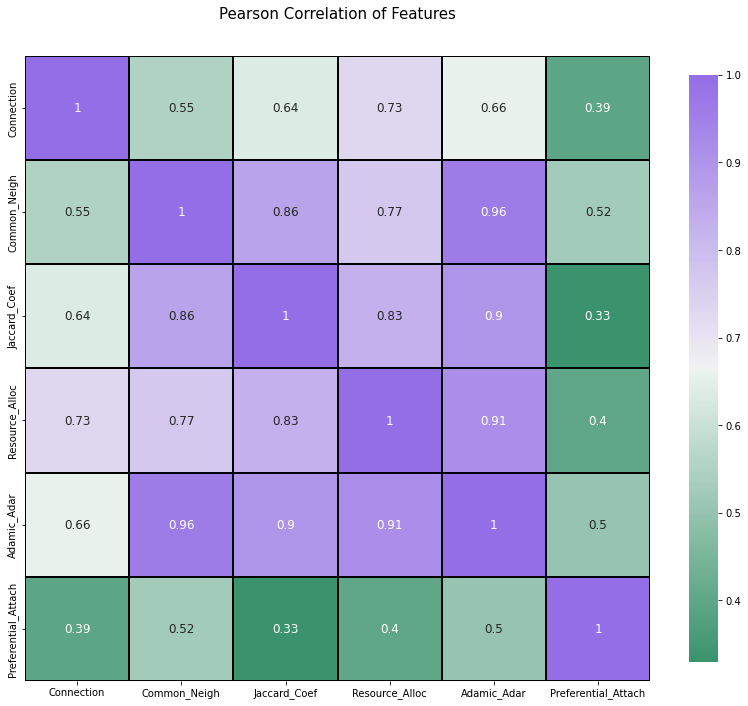

In [90]:
_ , ax = plt.subplots(figsize =(14, 12))
 
#setting the colormap
colormap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap = True)
 
#creating the heatmap
_ = sns.heatmap(df_2.corr(), cmap = colormap, square=True, cbar_kws={'shrink':.9 }, ax=ax, annot=True,
                                                    linewidths=0.1,vmax=1.0, linecolor='black', annot_kws={'fontsize':12 })
  
#adding title
plt.title('Pearson Correlation of Features', y=1.05, size=15)

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#features    
X = df_2.iloc[:,1:] 
X_scaled = scaler.fit_transform(X)

#target
y = df_2['Connection']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 0, shuffle=True, test_size=0.3)

In [ ]:
import joblib
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# scores = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']

# Initialize the classifiers
clf1 = SVC()
clf2 = KNeighborsClassifier()
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier(random_state=42)
clf5 = GradientBoostingClassifier()
clf6 = MLPClassifier(random_state=42,max_iter=1000)


# parameters for SVC
params1 = {}
params1['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
params1['classifier__kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
params1['classifier__degree'] = [3,4,5]
params1['classifier'] = [clf1]

# parameters for KNeighborsClassifier
params2 = {}
params2['classifier__n_neighbors'] = [3,4,5,6,7,8,9,10,15,20,25,30]
params2['classifier__p'] = [1,2]
params2['classifier'] = [clf2]

# parameters for DecisionTreeClassifier
params3 = {}
params3['classifier__criterion'] = ['gini','entropy']
params3['classifier__max_depth'] = [5,10,15,25,30,None]
params3['classifier__min_samples_split'] = [2,5,7,10,15]
params3['classifier__max_features'] = [None,'auto','sqrt','log2']
params3['classifier'] = [clf3]

# parameters for RandomForestClassifier
params4 = {}
params4['classifier__n_estimators'] = [10, 20, 50, 100, 200, 300]
params4['classifier__criterion'] = ['gini','entropy']
params4['classifier__max_depth'] = [5,10,15,25,30,40,50,None]
params4['classifier__min_samples_split'] = [2,5,7,10,15]
params4['classifier__max_features'] = [None,'auto','sqrt','log2']
params4['classifier'] = [clf4]

# parameters for GradientBoostingClassifier
params5 = {}
params5['classifier__loss'] = ['deviance','exponential']
params5['classifier__learning_rate'] = [10**-3,10**-2, 10**-1]
params5['classifier__n_estimators'] = [10, 20, 50, 100, 200, 300]
params5['classifier__max_depth'] = [5,10,15,25,30,40,50,None]
params5['classifier__max_features'] = [None,'auto','sqrt','log2']
params5['classifier'] = [clf5]

# parameters for MLPClassifier
params6 = {}
params6['classifier__hidden_layer_sizes'] = [(100,),(5,5,),(10,10,),(5,5,5,),(10,10,10,),(10,15,10,),(15,15,15,)]
params6['classifier__activation'] = ['relu', 'tanh']
params6['classifier__learning_rate'] = ['constant', 'adaptive']
params6['classifier'] = [clf6]


# creating the pipline
pipeline = Pipeline([('classifier', clf1)])
params = [params1, params2, params3, params4, params5, params6]


# applying grid search
# gs = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, scoring=scores, refit='roc_auc', verbose=3).fit(X_train, y_train)
gs = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, scoring='roc_auc', verbose=3).fit(X_train, y_train)


# saving the grid search results for later use
joblib.dump(gs, 'grid_search_object.pkl')

print(gs.best_params_)


# writing the results to a csv and sorting the rows by f1 score
grid_results = joblib.load("grid_search_object.pkl")
results_df = pd.DataFrame(grid_results.cv_results_)
main_df = results_df[['params','mean_test_accuracy','rank_test_accuracy','mean_test_precision','rank_test_precision','mean_test_recall','rank_test_recall','mean_test_roc_auc','rank_test_roc_auc','mean_test_f1','rank_test_f1']]
main_df = main_df.sort_values(by=["rank_test_roc_auc"])


# extracting the classifier name from params column and set it as an index for more readability
classifiers = ['SVC', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'MLPClassifier']

for index, row in main_df.iterrows():
    for i in classifiers:
        if str(row['params']).find(i) != -1:
            main_df.at[index,'classifier'] = i

main_df.set_index('classifier', inplace=True)

main_df.to_csv('grid_search_results')

# Plotting the results
plt.scatter(main_df["mean_test_roc_auc"],main_df["rank_test_roc_auc"], s = main_df["mean_test_f1_lime"])

plt.figure(figsize=(20,10))
plt.bar(main_df["classifier"],main_df["mean_test_roc_auc"])
plt.savefig("grid_search_result.png")